## Observations and Insights 

#1. The correlation coefficent for mouse weight and average tumor volume for the Capomulin regimen is 0.842. This is a strong positve correlation, revealing the strong relationship between weight and tumor volume. As weight increases it is highy likely that tumor volume will increase as well.

#2. Capomulin and Ramicane had the most unique measurements taken, lowest average final tumor volumes as well as the lowest standard deviation, making them the best candidates of the group.  

#3. The sex of the mice was 51% male and 49% female. This is a good even division to allow us to further evaluate the data.

#4. The cleaned data revealed a total of 248 unique mice with a combined total of 1880 unique entries.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_mouse_data.head()

## Observations and Insights 
#The two files merged together nicely and with out column repeats. Can make Mouse ID the idnex to 
#better view and sort data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
total_mice1 = len(combined_mouse_data["Mouse ID"].value_counts())
total_entries1 = combined_mouse_data["Mouse ID"].count()

print(f"Total number of unique mice: {total_mice1}")
print(f"Total number of unique data entries: {total_entries1}")

Total number of unique mice: 249
Total number of unique data entries: 1893


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_data_info = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicated_mouse_info = pd.DataFrame(duplicated_data_info)
duplicated_mouse_info



,0
0,g989


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mouse_data_altered_index = combined_mouse_data.copy()
combined_mouse_data_altered_index = combined_mouse_data_altered_index.set_index("Mouse ID")
all_duplicate_data = combined_mouse_data_altered_index.loc[['g989']]
all_duplicate_data


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_mouse_data = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(duplicated_data_info) == False]
cleaned_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.

total_mice2 = len(cleaned_mouse_data["Mouse ID"].value_counts())
total_entries2 = cleaned_mouse_data["Mouse ID"].count()

print(f"Total number of unique mice: {total_mice2}")
print(f"Total number of unique data entries: {total_entries2}")

Total number of unique mice: 248
Total number of unique data entries: 1880


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_df = cleaned_mouse_data.groupby("Drug Regimen")
summary_data = summary_df["Tumor Volume (mm3)"]

summary_mean = summary_data.mean().round(3)
summary_median = summary_data.median().round(3)
summary_variance = summary_data.var().round(3)
summary_std = summary_data.std().round(3)
summary_sem = summary_data.sem().round(3)

summary_stats_df = pd.DataFrame({"Average": summary_mean,
                                "Median": summary_median,
                                 "Variance": summary_variance,
                                "Standard Deviation": summary_std,
                                "SEM": summary_sem}) 

summary_stats_df

,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats2_df = (cleaned_mouse_data.groupby(['Drug Regimen'])["Tumor Volume (mm3)"]
                 .agg([('Average','mean'),('Median','median'),('Variance', 'var'), 
                       ('Standard Deviation', 'std'), ('SEM', 'sem')])).round(3)
summary_stats2_df

,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

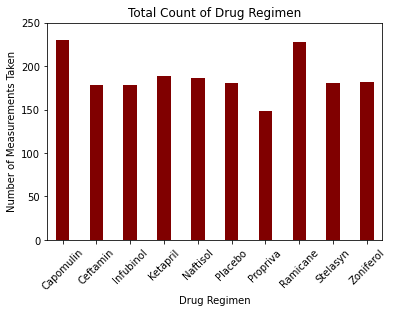

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

sorted_df = cleaned_mouse_data["Drug Regimen"].value_counts()
sorted_df = pd.DataFrame(sorted_df).sort_index()

sorted_df.plot(kind = 'bar', rot=45, color='maroon', width = 0.4, legend=False)
plt.ylim(0,250)
plt.xlabel("Drug Regimen") 
plt.ylabel("Number of Measurements Taken") 
plt.title("Total Count of Drug Regimen") 

plt.show()

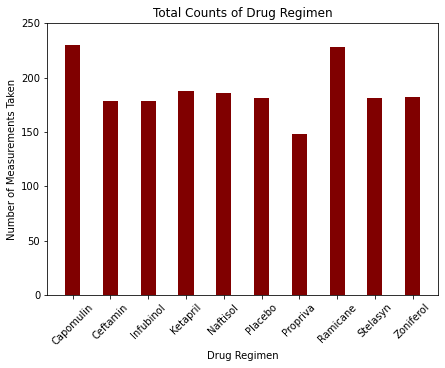

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

summary_stats3_df = (cleaned_mouse_data.groupby(['Drug Regimen'])["Mouse ID"]
                 .agg([('Total','count')])).reset_index()

drug_regimen = summary_stats3_df['Drug Regimen'] 
measurements_taken = summary_stats3_df['Total'] 
   
fig = plt.figure(figsize = (7, 5)) 
  
plt.bar(drug_regimen, measurements_taken, color ='maroon', width = 0.4)

plt.ylim(0,250)
plt.xticks(rotation=45)  
plt.xlabel("Drug Regimen") 
plt.ylabel("Number of Measurements Taken") 
plt.title("Total Counts of Drug Regimen") 

plt.show() 

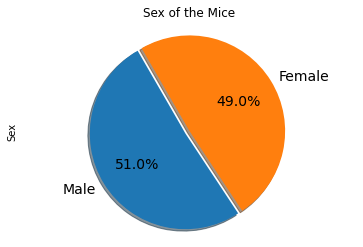

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

cleaned_mouse_data["Sex"].value_counts().plot(kind='pie',startangle=120,
    autopct='%1.1f%%', shadow=True, legend = False, fontsize=14, explode=(0,.05), title = "Sex of the Mice")

plt.axis('equal')
plt.show()

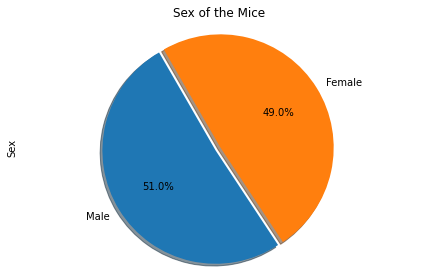

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = cleaned_mouse_data['Sex'].value_counts()
    
plt.pie(counts.values , labels=counts.index.values, 
       shadow=True, explode=(0,0.05), startangle=120, autopct='%1.1f%%')

plt.ylabel("Sex")
plt.title("Sex of the Mice")
plt.axis('equal')
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = cleaned_mouse_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tumor_merge= pd.merge(max_tumor, cleaned_mouse_data, on=['Mouse ID', 'Timepoint'], how='left')

#display df
max_tumor_merge.head()
                                             

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    final_tumor_numbers = max_tumor_merge.loc[max_tumor_merge["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(final_tumor_numbers)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_numbers.quantile([0.25,0.5,0.75])
    lowerq = (quartiles[0.25]).round(3)
    middleq = (quartiles[0.5]).round(3)
    upperq = (quartiles[0.75]).round(3)
    iqr = (upperq - lowerq).round(3)
    lower_bound = (lowerq - (1.5*iqr)).round(3)
    upper_bound = (upperq + (1.5*iqr)).round(3) 
    outliers = final_tumor_numbers.loc[(final_tumor_numbers < lower_bound) | (final_tumor_numbers > upper_bound)]
    if outliers.empty: 
        print(f"{drug}'s potential outliers: None")
    else:
        print(f"{drug}'s potential outliers index and value: {outliers}")


Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers index and value: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: None


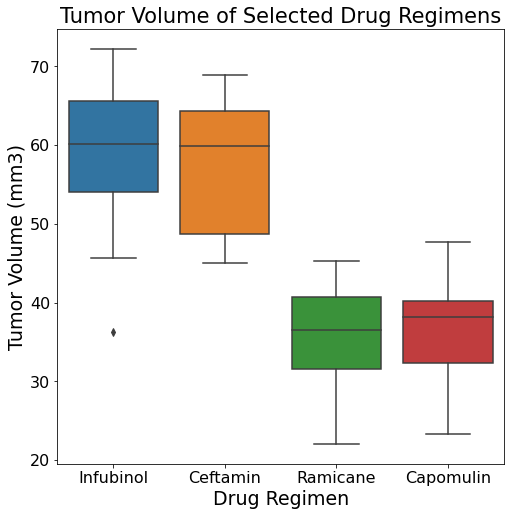

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

select_max_tumor_merge = max_tumor_merge.loc[(max_tumor_merge['Drug Regimen'] == 'Capomulin') |
                                            (max_tumor_merge['Drug Regimen'] == 'Ramicane') |
                                            (max_tumor_merge['Drug Regimen'] == 'Infubinol') |
                                            (max_tumor_merge['Drug Regimen'] == 'Ceftamin')]

fig1, ax1 = plt.subplots(figsize=(8, 8))
sns.boxplot(x= 'Drug Regimen', y='Tumor Volume (mm3)', data = select_max_tumor_merge)


ax1.set_title('Tumor Volume of Selected Drug Regimens', fontsize =21)
plt.xlabel('Drug Regimen', fontsize =19)
plt.ylabel('Tumor Volume (mm3)', fontsize =19)
plt.tick_params(labelsize=16)

plt.show()

## Line and Scatter Plots

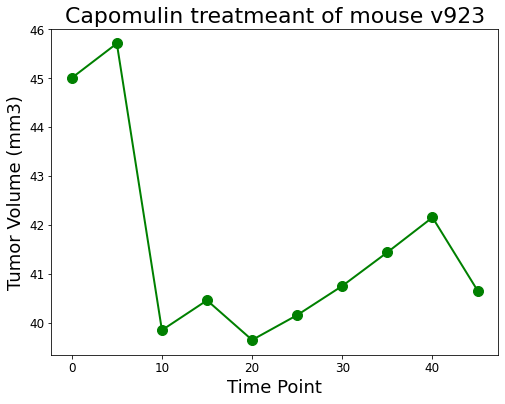

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_mouse_v923_df = cleaned_mouse_data.loc[cleaned_mouse_data['Mouse ID'] == 'v923',:]

x_axis = capomulin_mouse_v923_df["Timepoint"]
y_axis = capomulin_mouse_v923_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(8, 6))
plt.title('Capomulin treatmeant of mouse v923', fontsize = 22)
plt.plot(x_axis, y_axis, linewidth = 2, markersize = 10, marker = "o", color = "green")
plt.xlabel('Time Point', fontsize =18)
plt.ylabel('Tumor Volume (mm3)', fontsize =18)
plt.tick_params(labelsize=12)

plt.show()

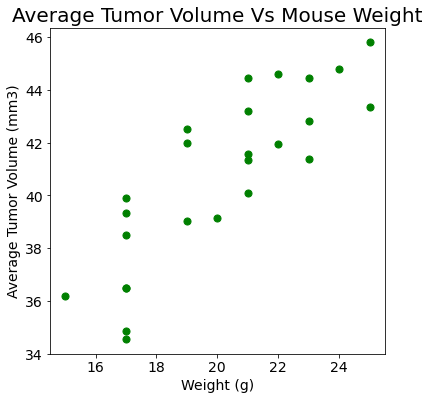

In [25]:
# Generate a scatter plot of avgerage_capomilin_volume for the Capomulin regimen
capomulin_mice_df = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Capomulin',:]
avgerage_capomilin_volume = capomulin_mice_df.groupby(['Mouse ID']).mean()

plt.figure(figsize=(6,6))
plt.scatter(avgerage_capomilin_volume['Weight (g)'], avgerage_capomilin_volume['Tumor Volume (mm3)'], color="green", s=50)
plt.title('Average Tumor Volume Vs Mouse Weight',fontsize =20)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)
plt.tick_params(labelsize=14)

plt.show()

## Correlation and Regression

For the for the Capomulin regimen
The correlation coeddicient between mouse weight and average tumor volume is 0.842
The r-squared is: 0.7088568047708717
Slope of the regression line: y = 0.95x + 21.55


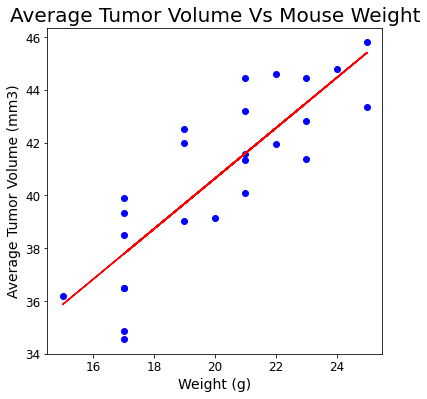

In [23]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
capomulin_mice_df = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Capomulin',:]
correlation_coeff = round(avgerage_capomilin_volume['Weight (g)'].corr(avgerage_capomilin_volume['Tumor Volume (mm3)']), 3)

# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = avgerage_capomilin_volume['Weight (g)']
y_values = avgerage_capomilin_volume['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(6,6))
plt.scatter(x_values,y_values, color='blue')
plt.plot(x_values,regress_values,"r-")

plt.title('Average Tumor Volume Vs Mouse Weight',fontsize =20)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)
plt.tick_params(labelsize=12)
print(f"For the for the Capomulin regimen")
print(f"The correlation coeddicient between mouse weight and average tumor volume is {correlation_coeff}")
print(f"The r-squared is: {rvalue**2}")
print(f"Slope of the regression line: {line_eq}")
plt.show()